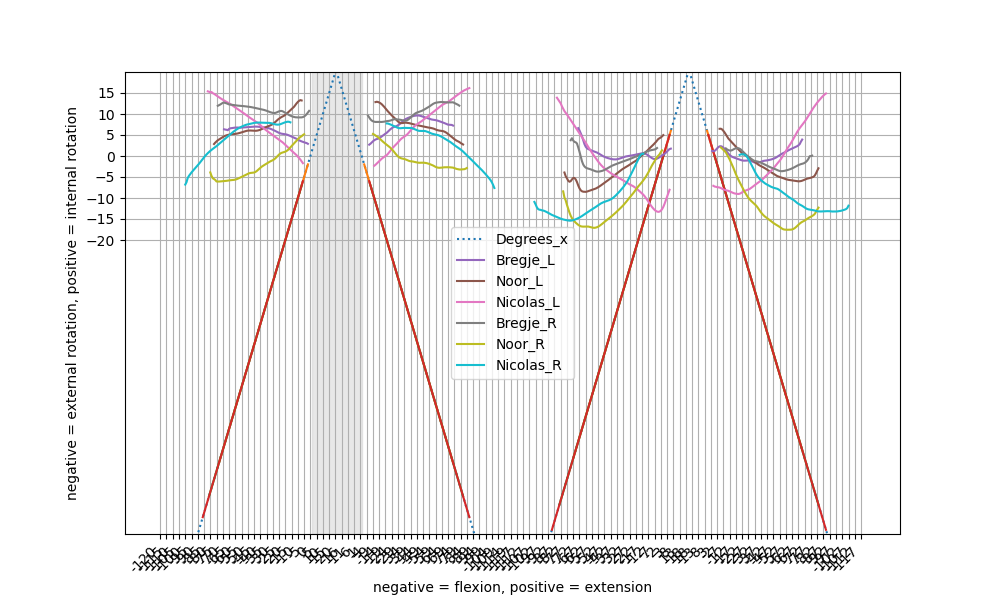

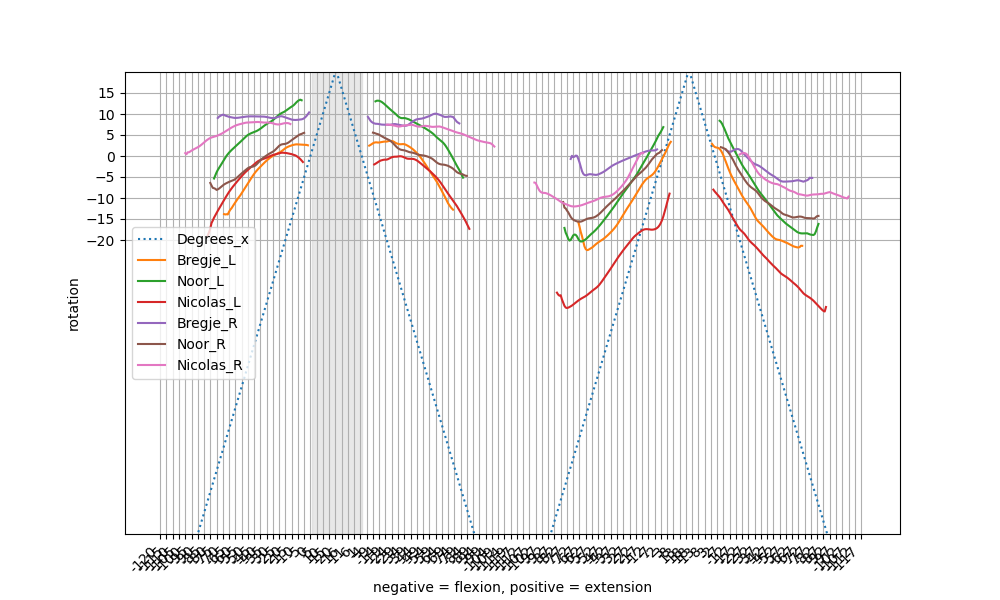

In [73]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.transform import Rotation as R
from scipy.signal import find_peaks, peak_prominences


df1_L = pd.read_csv('Output/Bregje-L_analysis.csv')
df1_R = pd.read_csv('Output/Bregje-R_analysis_negated.csv')
df2_L = pd.read_csv('Output/Noor-L_analysis.csv')
df2_R = pd.read_csv('Output/Noor-R_analysis_negated.csv')
df3_L = pd.read_csv('Output/Nicolas-L_analysis.csv')
df3_R = pd.read_csv('Output/Nicolas-R_analysis_negated.csv')

# smooth data 'Diff_z_avg'
df1_L['Diff_z_avg'] = df1_L['Diff_z_avg'].rolling(5).mean()
df2_L['Diff_z_avg'] = df2_L['Diff_z_avg'].rolling(5).mean()
df3_L['Diff_z_avg'] = df3_L['Diff_z_avg'].rolling(5).mean()
df1_R['Diff_z_avg'] = df1_R['Diff_z_avg'].rolling(5).mean()
df2_R['Diff_z_avg'] = df2_R['Diff_z_avg'].rolling(5).mean()
df3_R['Diff_z_avg'] = df3_R['Diff_z_avg'].rolling(5).mean()



# smooth data 'minus_Sensor2_z_plus_Sensor1_z_avg'
df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'] = df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()
df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'] = df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'].rolling(5).mean()


fig, ax = plt.subplots(figsize=(10, 6))

# y axis range from -90 to 20
ax.set_ylim(-90, 20)

ax.plot(df1_L.index, df1_L['Degrees_x'], label='Degrees_x', linestyle=':')



ax.plot(df1_L.index, df1_L['Diff_x_avg'])
ax.plot(df2_L.index, df2_L['Diff_x_avg'])
ax.plot(df3_L.index, df3_L['Diff_x_avg'])


ax.plot(df1_L.index, df1_L['Diff_z_avg'], label='Bregje_L')
ax.plot(df2_L.index, df2_L['Diff_z_avg'], label='Noor_L')
ax.plot(df3_L.index, df3_L['Diff_z_avg'], label='Nicolas_L')
ax.plot(df1_R.index, df1_R['Diff_z_avg'], label='Bregje_R')
ax.plot(df2_R.index, df2_R['Diff_z_avg'], label='Noor_R')
ax.plot(df3_R.index, df3_R['Diff_z_avg'], label='Nicolas_R')

# Select every 5th value from 'Degrees_x' for custom x-axis ticks
x_ticks = df1_L.index[::5]
x_ticklabels = df1_L['Degrees_x'][::5]

# Set custom x-axis ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=45, ha='right')

ax.set_yticks(np.arange(-20, 20, 5))

ax.axvspan(121, 161, color='lightgray', alpha=0.5)

ax.grid(True)
ax.set_ylabel('negative = external rotation, positive = internal rotation')
ax.set_xlabel('negative = flexion, positive = extension')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

# y axis range from -90 to 20
ax.set_ylim(-90, 20)

ax.plot(df1_L.index, df1_L['Degrees_x'], label='Degrees_x', linestyle=':')

ax.plot(df1_L.index, df1_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
ax.plot(df2_L.index, df2_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
ax.plot(df3_L.index, df3_L['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
ax.plot(df1_R.index, df1_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
ax.plot(df2_R.index, df2_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
ax.plot(df3_R.index, df3_R['minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')

# Select every 5th value from 'Degrees_x' for custom x-axis ticks
x_ticks = df1_L.index[::5]
x_ticklabels = df1_L['Degrees_x'][::5]

# Set custom x-axis ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=45, ha='right')

ax.set_yticks(np.arange(-20, 20, 5))

ax.axvspan(121, 161, color='lightgray', alpha=0.5)

ax.grid(True)
ax.set_ylabel('rotation')
ax.set_xlabel('negative = flexion, positive = extension')
ax.legend()
plt.show()




In [74]:
z_only_zero_1_L = pd.read_csv('Output/Bregje-L_z_only_zero.csv')
z_only_zero_2_L = pd.read_csv('Output/Noor-L_z_only_zero.csv')
z_only_zero_3_L = pd.read_csv('Output/Nicolas-L_z_only_zero.csv')


z_only_zero_1_R = pd.read_csv('Output/Bregje-R_z_only_zero.csv')
z_only_zero_2_R = pd.read_csv('Output/Noor-R_z_only_zero.csv')
z_only_zero_3_R = pd.read_csv('Output/Nicolas-R_z_only_zero.csv')

# # negate z_only_zero_1_R
# z_only_zero_1_R = -z_only_zero_1_R
# z_only_zero_2_R = -z_only_zero_2_R
# z_only_zero_3_R = -z_only_zero_3_R

# negate z_only_zero except for the first column ('from_max_extension')
z_only_zero_1_R.iloc[:, 1:] = -z_only_zero_1_R.iloc[:, 1:]
z_only_zero_2_R.iloc[:, 1:] = -z_only_zero_2_R.iloc[:, 1:]
z_only_zero_3_R.iloc[:, 1:] = -z_only_zero_3_R.iloc[:, 1:]

# only keep the first 70 rows
z_only_zero_1_L = z_only_zero_1_L[:40]
z_only_zero_2_L = z_only_zero_2_L[:40]
z_only_zero_3_L = z_only_zero_3_L[:40]
z_only_zero_1_R = z_only_zero_1_R[:40]
z_only_zero_2_R = z_only_zero_2_R[:40]
z_only_zero_3_R = z_only_zero_3_R[:40]

# Define list of subjects
subjects = [
    (z_only_zero_1_L, 'Bregje-L'),
    (z_only_zero_2_L, 'Noor-L'),
    (z_only_zero_3_L, 'Nicolas-L'),
    (z_only_zero_1_R, 'Bregje-R'),
    (z_only_zero_2_R, 'Noor-R'),
    (z_only_zero_3_R, 'Nicolas-R')
]


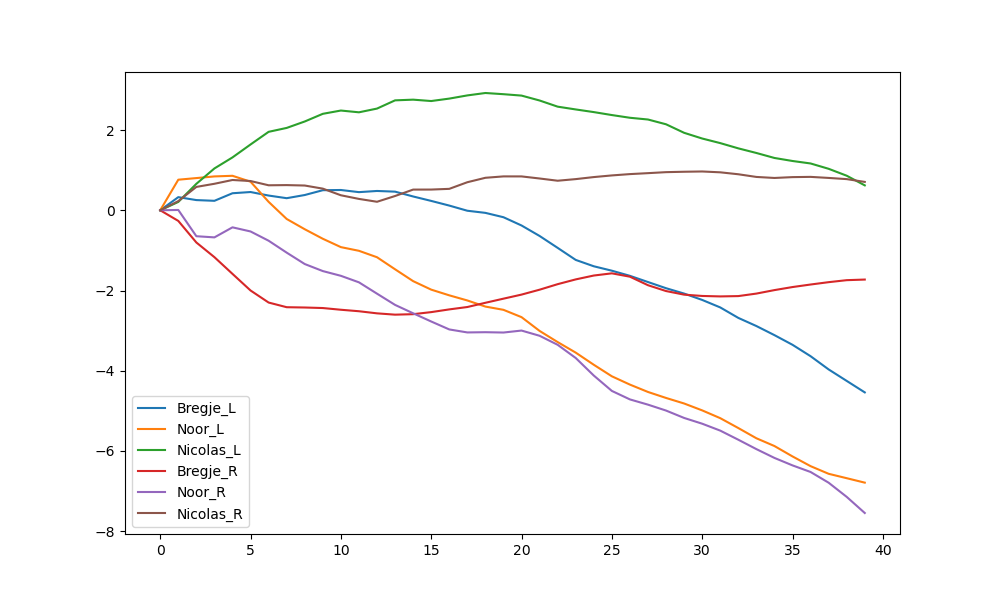

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(z_only_zero_1_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
plt.plot(z_only_zero_2_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
plt.plot(z_only_zero_3_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
plt.plot(z_only_zero_1_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
plt.plot(z_only_zero_2_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
plt.plot(z_only_zero_3_R['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(z_only_zero_1_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_L')
# plt.plot(z_only_zero_2_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_L')
# plt.plot(z_only_zero_3_L['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_L')
# plt.plot(z_only_zero_1_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Bregje_R')
# plt.plot(z_only_zero_2_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Noor_R')
# plt.plot(z_only_zero_3_R['OKC_flexion_only_minus_Sensor2_z_plus_Sensor1_z_avg'], label='Nicolas_R')
# plt.show()



**Linear Regression**

In [75]:
from sklearn.linear_model import LinearRegression

X = z_only_zero_1_L['from_max_extension'].values.reshape(-1, 1)
y = z_only_zero_1_L['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'].values

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict([[0]]))


0.8596234911809836
[-0.12467796]
1.4053864825035385
[1.40538648]


Cubic Regression

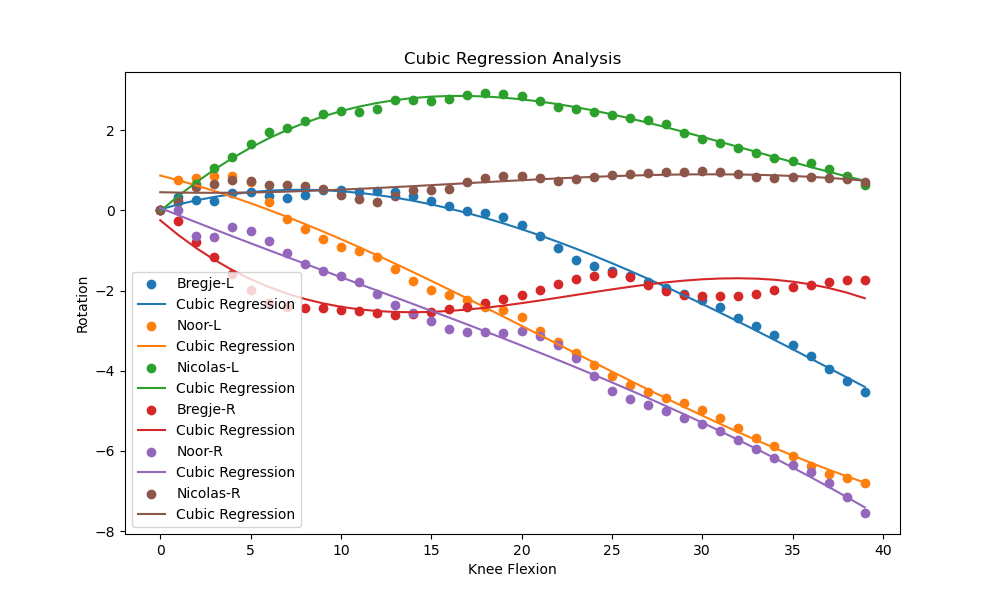

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define function for cubic regression analysis
def cubic_regression_analysis(data, subject_name, ax=None):
    X = data['from_max_extension'].values
    Y = data['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'].values

    # Perform cubic regression analysis
    coefficients = np.polyfit(X, Y, 3)  # Fit a polynomial of degree 3
    p = np.poly1d(coefficients)  # Create a polynomial function

    # Plot data and regression line
    ax.scatter(X, Y, label=subject_name)
    ax.plot(X, p(X), label='Cubic Regression')

    ax.set_xlabel('Knee Flexion')
    ax.set_ylabel('Rotation')
    ax.set_title('Cubic Regression Analysis')
    ax.legend()

# Create a figure and axis outside the loop
fig, ax = plt.subplots(figsize=(10, 6))

for subject_data, subject_name in subjects:
    cubic_regression_analysis(subject_data, subject_name, ax)

plt.show()


Spline Regression

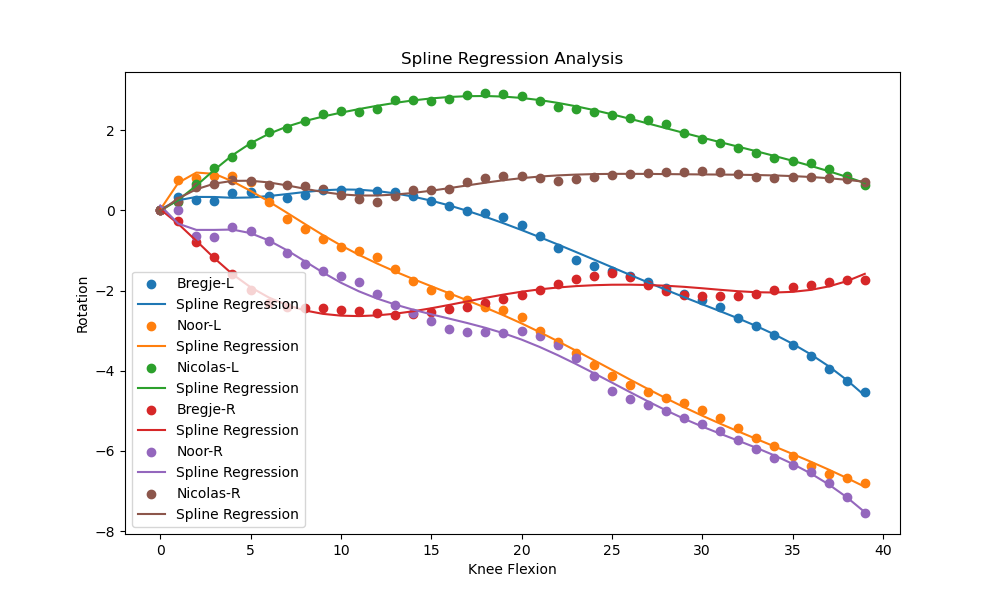

In [77]:
from scipy.interpolate import LSQUnivariateSpline
import matplotlib.pyplot as plt

subjects = [
    (z_only_zero_1_L, 'Bregje-L'),
    (z_only_zero_2_L, 'Noor-L'),
    (z_only_zero_3_L, 'Nicolas-L'),
    (z_only_zero_1_R, 'Bregje-R'),
    (z_only_zero_2_R, 'Noor-R'),
    (z_only_zero_3_R, 'Nicolas-R')
]

def spline_regression_analysis(data, subject_name, ax=None):
    X = data['from_max_extension'].values
    Y = data['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'].values

    # Fit spline regression
    spline = LSQUnivariateSpline(X, Y, t=np.percentile(X, [10, 25, 50, 75]), k=3)

    # The t parameter specifies the knots (points where the polynomial pieces join), and k is the degree of the spline (cubic spline in this case).

    # Plot data and spline curve
    if ax:
        ax.scatter(X, Y, label=subject_name)
        ax.plot(X, spline(X), label='Spline Regression')

        ax.set_xlabel('Knee Flexion')
        ax.set_ylabel('Rotation')
        ax.set_title('Spline Regression Analysis')
        ax.legend()

# Create a figure and axis outside the loop
fig, ax = plt.subplots(figsize=(10, 6))

# Perform spline regression analysis for each subject
for subject_data, subject_name in subjects:
    spline_regression_analysis(subject_data, subject_name, ax)

plt.show()




Subject: Bregje-L
Spline Coefficients: [ 0.0212285   0.44341364  0.15502861  0.8187241  -0.27881541 -2.31199881
 -3.26197516 -4.61994027]
Knots: [ 0.    3.9   9.75 19.5  29.25 39.  ]
Residual Sum of Squares: 0.2520965530571444
Degree of Spline: 7
Number of Observations: 40

Subject: Noor-L
Spline Coefficients: [ 0.01479577  1.21389411  0.74472914 -1.38209689 -2.48082461 -5.16260607
 -6.15110406 -6.89198867]
Knots: [ 0.    3.9   9.75 19.5  29.25 39.  ]
Residual Sum of Squares: 0.4026913025863988
Degree of Spline: 7
Number of Observations: 40

Subject: Nicolas-L
Spline Coefficients: [-0.01445296  0.25361052  1.85977221  2.58931878  3.14217228  1.84364251
  1.19380492  0.68029756]
Knots: [ 0.    3.9   9.75 19.5  29.25 39.  ]
Residual Sum of Squares: 0.11226063229561409
Degree of Spline: 7
Number of Observations: 40

Subject: Bregje-R
Spline Coefficients: [ 0.02603653 -0.39022895 -2.10006123 -2.99812118 -1.85747497 -1.78128705
 -2.27157305 -1.58446668]
Knots: [ 0.    3.9   9.75 19.5  29.25

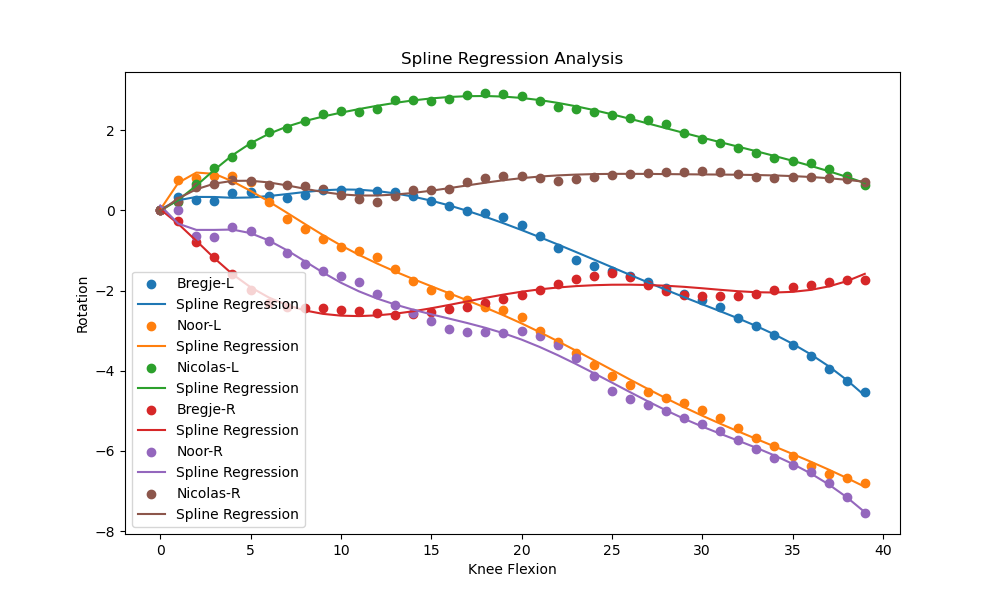

In [78]:
from scipy.interpolate import LSQUnivariateSpline
import matplotlib.pyplot as plt
import numpy as np

subjects = [
    (z_only_zero_1_L, 'Bregje-L'),
    (z_only_zero_2_L, 'Noor-L'),
    (z_only_zero_3_L, 'Nicolas-L'),
    (z_only_zero_1_R, 'Bregje-R'),
    (z_only_zero_2_R, 'Noor-R'),
    (z_only_zero_3_R, 'Nicolas-R')
]

def spline_regression_analysis(data, subject_name, ax=None):
    X = data['from_max_extension'].values
    Y = data['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'].values

    # Fit spline regression
    spline = LSQUnivariateSpline(X, Y, t=np.percentile(X, [10, 25, 50, 75]), k=3)

    # Get spline coefficients
    coefficients = spline.get_coeffs()

    # Get knots
    knots = spline.get_knots()

    # Get residual sum of squares
    rss = np.sum((spline(X) - Y) ** 2)

    # Get degree of spline
    degree = len(coefficients) - 1  # Degree is one less than the number of coefficients

    # Get number of observations
    num_observations = len(X)

    # Plot data and spline curve
    if ax:
        ax.scatter(X, Y, label=subject_name)
        ax.plot(X, spline(X), label='Spline Regression')

        ax.set_xlabel('Knee Flexion')
        ax.set_ylabel('Rotation')
        ax.set_title('Spline Regression Analysis')
        ax.legend()

    return {
        'coefficients': coefficients,
        'knots': knots,
        'residual_sum_of_squares': rss,
        'degree_of_spline': degree,
        'num_observations': num_observations
    }

# Create a figure and axis outside the loop
fig, ax = plt.subplots(figsize=(10, 6))

# Perform spline regression analysis for each subject
for subject_data, subject_name in subjects:
    analysis_results = spline_regression_analysis(subject_data, subject_name, ax)
    print(f"Subject: {subject_name}")
    print(f"Spline Coefficients: {analysis_results['coefficients']}")
    print(f"Knots: {analysis_results['knots']}")
    print(f"Residual Sum of Squares: {analysis_results['residual_sum_of_squares']}")
    print(f"Degree of Spline: {analysis_results['degree_of_spline']}")
    print(f"Number of Observations: {analysis_results['num_observations']}")
    print()

plt.show()


Cluster 0: ['Nicolas-L', 'Nicolas-R']
Cluster 1: ['Noor-L', 'Noor-R']
Cluster 2: ['Bregje-L', 'Bregje-R']


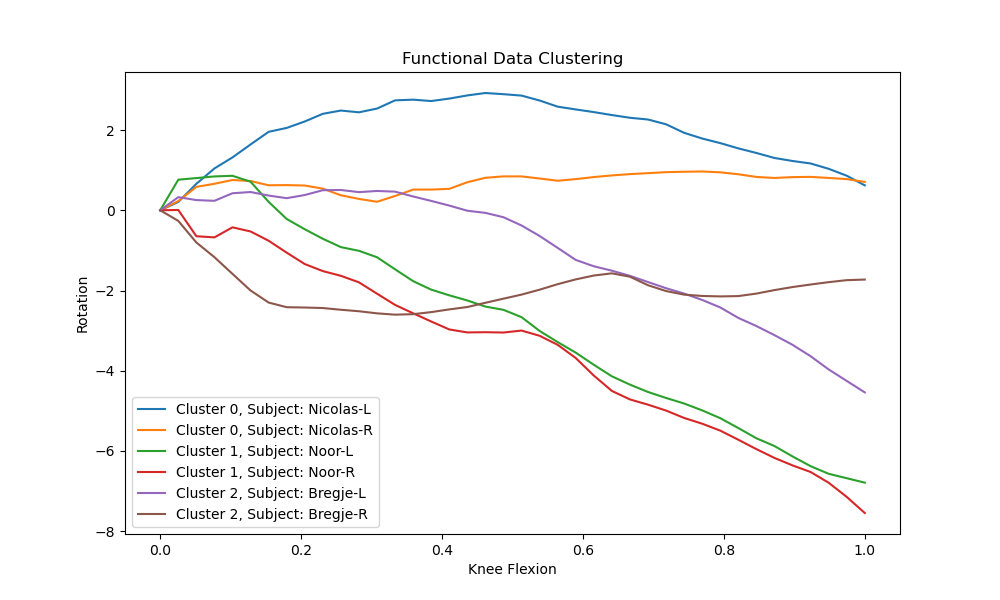

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
from sklearn.cluster import KMeans

# Prepare functional data
X = []  # List to store spline regression curves for each subject
subject_names = []  # List to store subject names
for subject_data, subject_name in subjects:
    X.append(subject_data['OKC_extension_only_minus_Sensor2_z_plus_Sensor1_z_avg'].values)
    subject_names.append(subject_name)

X = np.array(X)  # Convert to numpy array

# Create FDataGrid object
fd_grid = FDataGrid(data_matrix=X)

# Apply Functional Principal Component Analysis (FPCA)
n_components = 3  # Number of principal components
fpca = FPCA(n_components=n_components)
fd_grid_fpca = fpca.fit_transform(fd_grid)

# Perform clustering on the FPCA scores
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(fd_grid_fpca)  # Access transformed data directly

# Print the clusters
for cluster_id in range(n_clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    subject_names_in_cluster = [subject_names[idx] for idx in cluster_indices]
    print(f"Cluster {cluster_id}: {subject_names_in_cluster}")

# Visualize clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_indices = np.where(clusters == i)[0]
    for idx in cluster_indices:
        plt.plot(fd_grid[idx].grid_points[0], fd_grid[idx].data_matrix[0], label=f'Cluster {i}, Subject: {subject_names[idx]}')

plt.xlabel('Knee Flexion')
plt.ylabel('Rotation')
plt.title('Functional Data Clustering')
plt.legend()
plt.show()
